In [1]:
###############################################################################
# Bibliotecas
###############################################################################
#import sys
#!{sys.executable} -m pip install pygam
import numpy             as np
import pandas            as pd 
import matplotlib.pyplot as plt
from   mpl_toolkits import mplot3d

from sklearn.metrics import r2_score, explained_variance_score

from   pygam          import LinearGAM, LogisticGAM, PoissonGAM, l, s, f, te
from   pygam.datasets import mcycle, default, wage, chicago

import warnings, time, itertools
warnings.filterwarnings("ignore")
# DOCUMENTACION ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html
# https://buildmedia.readthedocs.org/media/pdf/pygam/latest/pygam.pdf

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


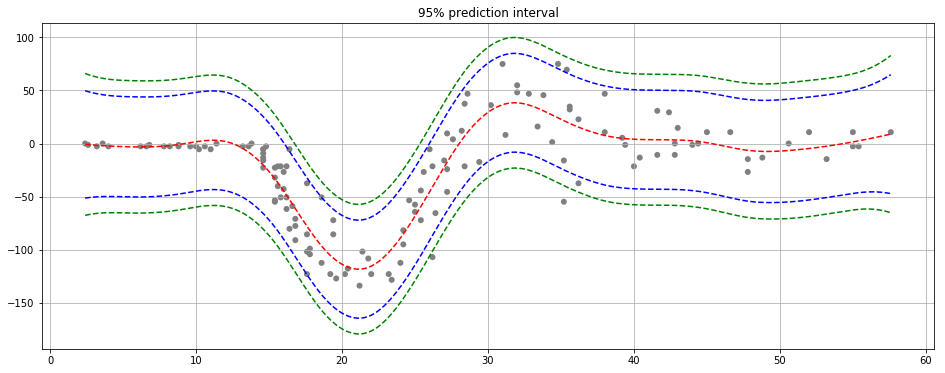

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.8135
Link Function:                     IdentityLink Log Likelihood:                                  -952.2409
Number of Samples:                          133 AIC:                                             1930.1088
                                                AICc:                                            1933.0789
                                                GCV:                                              609.3811
                                                Scale:                                            512.7965
                                                Pseudo R-Squared:                                   0.7984
Feature Function                  Lam

In [2]:
###############################################################################
# REGRESION CON DATOS :: mcycle
###############################################################################
# Cargamos los datos
X, y = mcycle(return_X_y=True)

# Generamos nuestro modelo Lineal GAM (función liga la identidad) con gridsearch para encontrar los mejores parámetros
gam = LinearGAM(n_splines=20,).gridsearch(X, y)

XX  = gam.generate_X_grid(term=0, n=500)

# Graficamos tanto los puntos, la regresión y dos intervalos de confianza
plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')
plt.plot(XX, gam.prediction_intervals(XX, width=.99), color='g', ls='--')
plt.scatter(X, y, facecolor='gray', edgecolors='none')
plt.title('95% prediction interval');
plt.grid()
plt.show()

# Mostramos el resumen del modelo
print( gam.summary() )

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


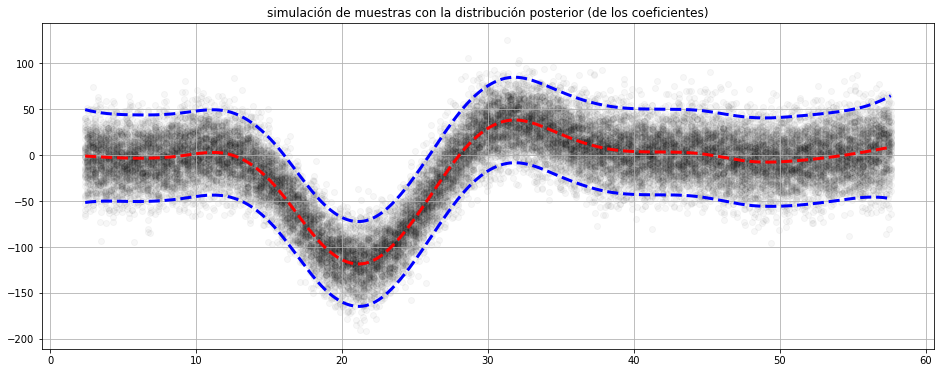

In [3]:
# También podemos simular de la distribución posterior (ya con el modelo ajustado)
plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.title('simulación de muestras con la distribución posterior (de los coeficientes)')
for response in gam.sample(X, y, quantity='y', n_draws=50, sample_at_X=XX, n_bootstraps=5 ):
    plt.scatter(XX, response, alpha=.03, color='k')
plt.plot(XX, gam.predict(XX), 'r--', linewidth=3)
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--', linewidth=3)
plt.grid()
plt.show()

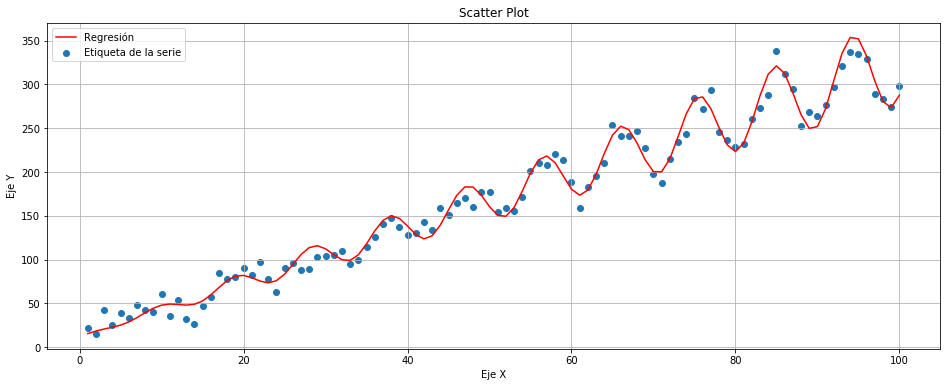

R cuadrada
0.9842333270329761
0.9843003729359154


In [4]:
###############################################################################
# REGRESION CON DATOS GENERADOS
###############################################################################
datos_4 = pd.read_csv("datos_ajuste_4.csv")
X, y    = datos_4["X"] , datos_4["Y"] 

# Realizamos un grafico de dispersión ( Scatter-Plot )
plt.figure( figsize=(16,6) )                           # Indicamos el tamaño de la gráfica
plt.title("Scatter Plot")                              # Añadimos el titulo
plt.scatter( X, y , label = "Etiqueta de la serie" )   # Añadimos la 'capa' de puntos 
plt.plot( X, 12 + np.pi*X + 0.5*X*np.cos(2/3*X) , label = "Regresión", color="red" )   # Añadimos la 'capa' de puntos 
plt.xlabel("Eje X")                                    # Modificamos la etiqueta del eje X
plt.ylabel("Eje Y")                                    # Modificamos la etiqueta del eje Y
plt.legend()                                           # Añadimos un cuadro con la leyenda
plt.grid()
plt.show()                                             # Indicamos que queremos mostrar la gráfica

print("R cuadrada")
print( r2_score(y, 12 + np.pi*X + 0.5*X*np.cos(2/3*X)) )
print( explained_variance_score(y, 12 + np.pi*X + 0.5*X*np.cos(2/3*X)) )


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


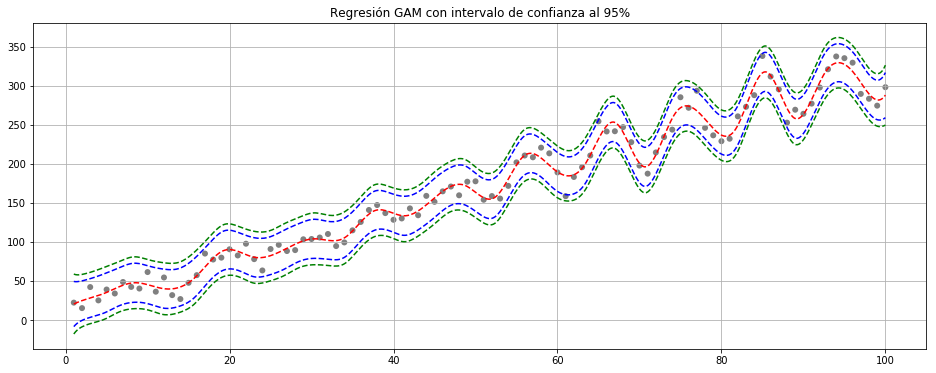

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     27.4047
Link Function:                     IdentityLink Log Likelihood:                                  -573.0481
Number of Samples:                          100 AIC:                                             1202.9055
                                                AICc:                                             1226.568
                                                GCV:                                              234.2154
                                                Scale:                                            122.5576
                                                Pseudo R-Squared:                                   0.9892
Feature Function                  Lam

In [9]:
###############################################################################
# REGRESION CON DATOS :: mcycle
###############################################################################
# Cargamos los datos
X, y = np.array(X).reshape( (100,1) ), y

# Generamos nuestro modelo Lineal GAM (función liga la identidad) con gridsearch para encontrar los mejores parámetros
gam = LinearGAM(terms = s(feature = 0, n_splines=30), fit_intercept=False ).gridsearch(X, y)
XX  = gam.generate_X_grid(term=0, n=500)

# Graficamos tanto los puntos, la regresión y dos intervalos de confianza
plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.scatter(X, y, facecolor='gray', edgecolors='none')
plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=0.95), color='b', ls='--')
plt.plot(XX, gam.prediction_intervals(XX, width=0.99), color='g', ls='--')
plt.title('Regresión GAM con intervalo de confianza al 95%');
plt.grid()
plt.show()

# Mostramos el resumen del modelo
print( gam.summary() )


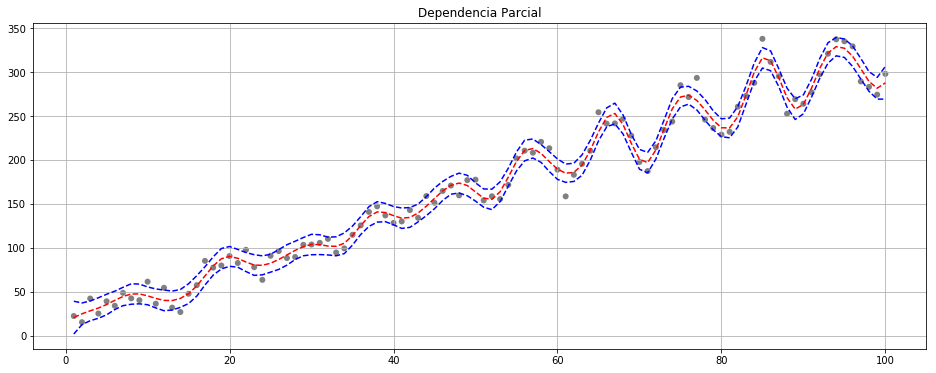

In [6]:
# Dependencia Parial
XX = gam.generate_X_grid(term=0)
pdep, confi = gam.partial_dependence(term=0, width=0.95)

plt.subplots(nrows=1, ncols=1, figsize=(16,6) )
plt.scatter(XX[:, 0], y, facecolor='gray', edgecolors='none' )
plt.plot(XX[:, 0], pdep,  color='r', ls='--' )
plt.plot(XX[:, 0], confi, color='b', ls='--' )
plt.title("Dependencia Parcial")
plt.grid()
plt.show()   

100% (11 of 11) |########################| Elapsed Time: 0:00:04 Time:  0:00:04


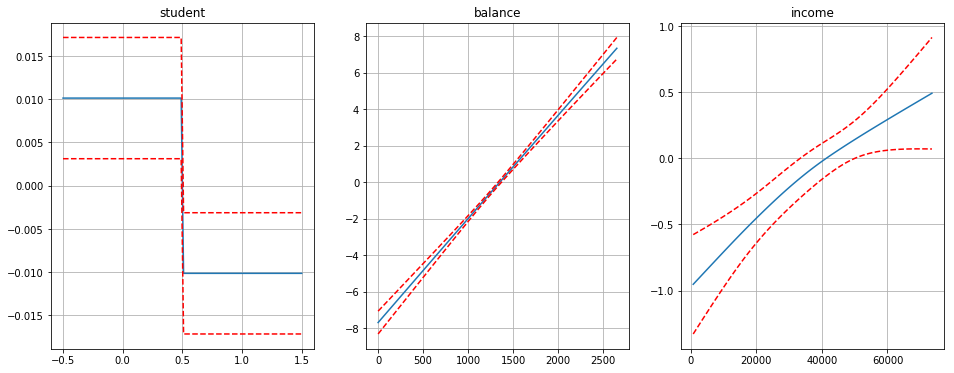

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.8047
Link Function:                        LogitLink Log Likelihood:                                   -788.877
Number of Samples:                        10000 AIC:                                             1585.3634
                                                AICc:                                             1585.369
                                                UBRE:                                               2.1588
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4598
Feature Function                  Lam

In [7]:
###############################################################################
# CLASIFICACION CON DATOS :: default
###############################################################################
# Cargamos los datos
X, y = default(return_X_y=True)

# Generamos nuestro modelo
gam = LogisticGAM(f(0) + s(1) + s(2)).gridsearch(X, y)

# Graficamos las dependencias parciales
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
titles = ['student', 'balance', 'income']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])
    ax.grid()
plt.show() 

# Mostramos el resumen del modelo
print( gam.summary() )

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     25.1911
Link Function:                     IdentityLink Log Likelihood:                                -24118.6847
Number of Samples:                         3000 AIC:                                            48289.7516
                                                AICc:                                           48290.2307
                                                GCV:                                             1255.6902
                                                Scale:                                           1236.7251
                                                Pseudo R-Squared:                                   0.2955
Feature Function                  Lam

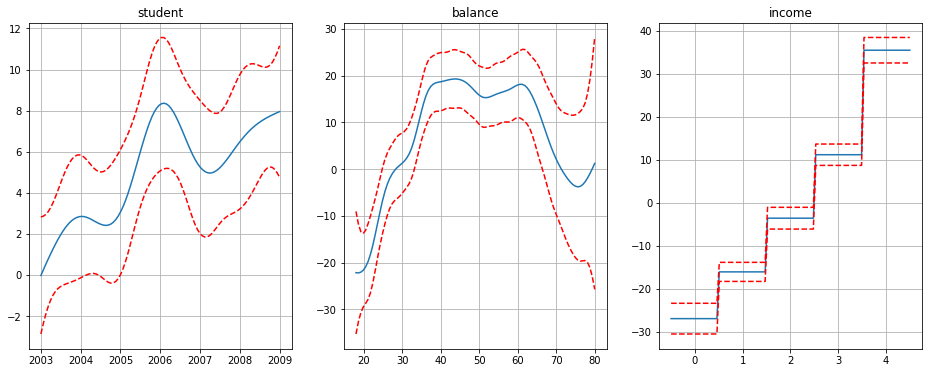

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     25.1911
Link Function:                     IdentityLink Log Likelihood:                                -24118.6847
Number of Samples:                         3000 AIC:                                            48289.7516
                                                AICc:                                           48290.2307
                                                GCV:                                             1255.6902
                                                Scale:                                           1236.7251
                                                Pseudo R-Squared:                                   0.2955
Feature Function                  Lam

In [10]:
###############################################################################
# REGRESION CON DATOS :: wage
###############################################################################

# Generamos los datos
X, y = wage()

# Generamos el modelo
gam = LinearGAM( s(feature = 0) + s(feature = 1) + f(feature = 2) ).fit(X, y)
gam.summary()

# Graficamos las dependencias parciales
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
titles = ['student', 'balance', 'income']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=0.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])
    ax.grid()
plt.show()  

# Mostramos el resumen del modelo
print( gam.summary() )

100% (11 of 11) |########################| Elapsed Time: 0:00:18 Time:  0:00:18


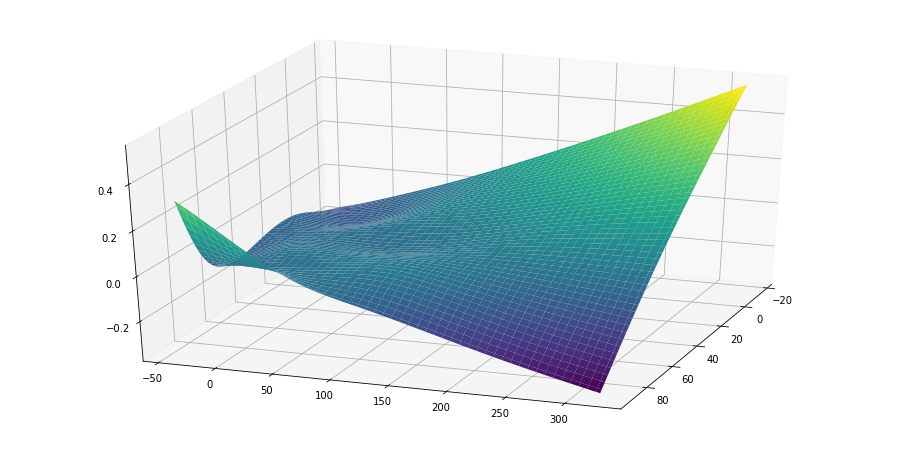

PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                    106.3038
Link Function:                          LogLink Log Likelihood:                                -19357.2147
Number of Samples:                         4863 AIC:                                             38927.037
                                                AICc:                                           38931.9254
                                                UBRE:                                               3.4432
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2838
Feature Function                  Lam

In [12]:
###############################################################################
# REGRESION CON DATOS :: chicaco
###############################################################################
# Cargamos los datos
X, y = chicago(return_X_y=True)

# Generamos nuestro modelo
gam = PoissonGAM( te(0,1) + te(1,2) + te(2,3) + te(0,2) + te(0,3) + te(2,3) ).gridsearch(X, y)

# Generamos la dependencia parcial
XX = gam.generate_X_grid(term=1, meshgrid=True)
Z  = gam.partial_dependence(term=1, X=XX, meshgrid=True)

# Graficamos la dependencia parcial del tensor
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16,8) )
axs = plt.axes(projection='3d')   # 
axs.view_init(elev = 30, azim=20) # Para rotar la grafica 3d 
axs.plot_surface(XX[0], XX[1], Z, cmap='viridis') 
plt.show()

# Mostramos el resumen del modelo
print( gam.summary() )


In [13]:
###############################################################################
# REGRESION CON DATOS :: chicaco
###############################################################################
# Cargamos los datos
X, y = chicago(return_X_y=True)

# Generamos arreglos con los hiperparametros
lambdas_1  = np.logspace(start = -3, stop = 3,   num = 2)
lambdas_2  = np.logspace(start = -3, stop = 3,   num = 2)
lambdas_3  = np.logspace(start = -3, stop = 3,   num = 2)
nsplines_1 = np.linspace(start = 10, stop = 200, num = 2).astype("int")
nsplines_3 = np.linspace(start = 10, stop = 200, num = 2).astype("int")

# Generamos nuestro arreglo con todas las combinaciones y realizamos todos los modelos
# parametros_grid = [ [a,b,c,d,e] for a in lambdas_1 for b in lambdas_2 for c in lambdas_3 for d in nsplines_1 for e in nsplines_3 ]
parametros_grid = list( itertools.product( lambdas_1, lambdas_2, lambdas_3, nsplines_1, nsplines_3 ) )
tiempo_inicial  = time.time()
RMSEs = np.array([])
for indice, ( l1, l2, l3, ns1, ns3 ) in enumerate( parametros_grid ):
    print("Creando modelo " + str(indice+1) + " de " + str(len(parametros_grid)) + " (" + str( np.int( np.divide(indice+1,len(parametros_grid))*100) ) + "%)" , end="\r")
    gam   = PoissonGAM( s(0, lam = l1, n_splines=ns1 ) + te(3, 1, lam=l2) + s(2, lam=l3, n_splines=ns3) ).fit(X, y)
    RMSEs = np.append( RMSEs, np.sum( np.power( y - gam.predict(X) , 2 ) ) )
tiempo_final       = time.time()
mejores_parametros = parametros_grid[ np.argmin( RMSEs ) ]
gam   = PoissonGAM( s(0, lam = mejores_parametros[0], n_splines=mejores_parametros[3] ) + te(3, 1, lam=mejores_parametros[1]) + s(2, lam=mejores_parametros[2], n_splines=mejores_parametros[4]) ).fit(X, y)

# Mostramos el resumen del modelo
print("Tiempo de procesamiento ->", tiempo_final - tiempo_inicial, "segundos." )
print("Mejores parámetros      ->", mejores_parametros, end="\n\n" )
print( gam.summary() , end="\n\n" )

# Modificamos
gam = PoissonGAM( s(0, lam = mejores_parametros[0], n_splines=mejores_parametros[3] ) + te(3, 1, lam=mejores_parametros[1]), fit_intercept=False ).fit(X, y)
print( gam.summary() )

Tiempo de procesamiento -> 45.105000019073486 segundos.
Mejores parámetros      -> (0.001, 0.001, 0.001, 200, 200)

PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                    345.2243
Link Function:                          LogLink Log Likelihood:                                -18673.6196
Number of Samples:                         4863 AIC:                                            38037.6879
                                                AICc:                                           38090.9312
                                                UBRE:                                               3.2996
                                                Scale:                                                 1.0
                            